In [1]:
import pyspark
import pandas as pd
import numpy as np

In [2]:
train_labels = pd.read_csv(r"C:\Users\Matias\Documents\datos\train_labels.csv",delimiter =',')

In [3]:
train_values = pd.read_csv(r"C:\Users\Matias\Documents\datos\train_values.csv",delimiter =',')

In [4]:
types_of_materials = train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']]

In [5]:
types_of_materials.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [6]:
types_of_materials_sum = types_of_materials.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum()/len(types_of_materials.index)

## Se puede observar que el tipo de material mas usado en las construcciones es el mud mortar stone

In [7]:
types_of_materials_sum.sort_values(ascending = False).plot(kind= 'barh',figsize=(6, 4),title='Uso de Materiales en las Construcciones %')

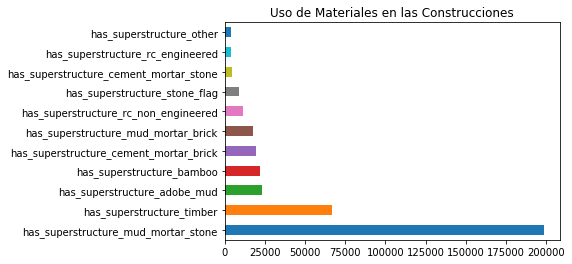

In [8]:
train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum().sort_values(ascending = False).plot(kind= 'barh',figsize=(6, 4),title='Uso de Materiales en las Construcciones',)

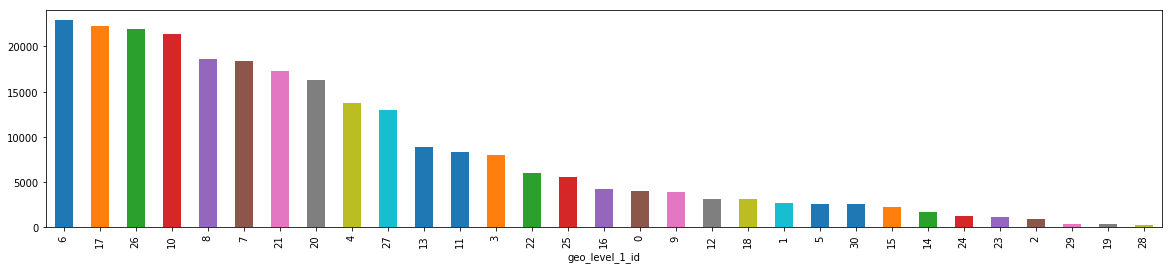

In [9]:
train_values.groupby('geo_level_1_id')['count_families'].sum().sort_values(ascending = False).plot(kind='bar',figsize=(20, 4))
  

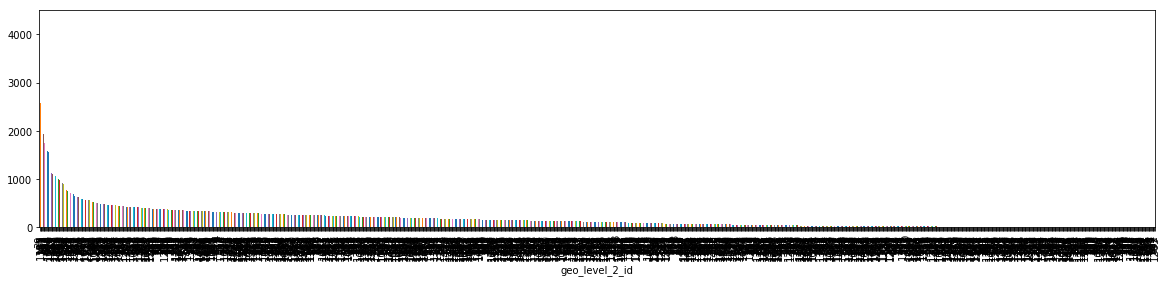

In [10]:
train_values.groupby('geo_level_2_id')['count_families'].sum().sort_values(ascending = False).plot(kind='bar',figsize=(20, 4))

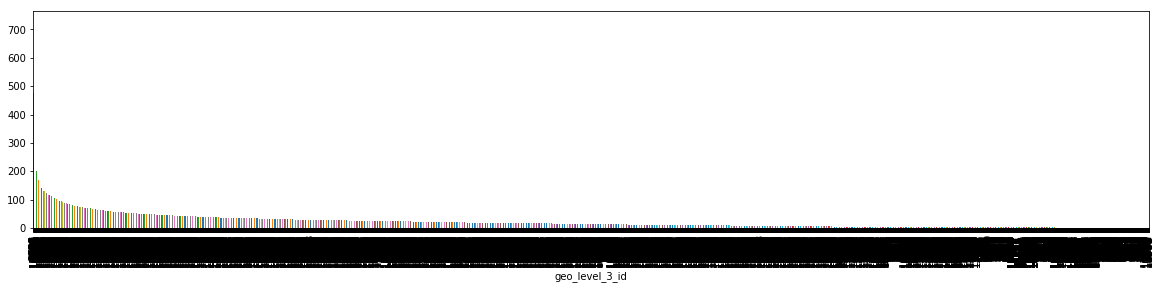

In [11]:
train_values.groupby('geo_level_3_id')['count_families'].sum().sort_values(ascending = False).plot(kind='bar',figsize=(20, 4))

In [12]:
secondary_use = train_values[['has_secondary_use']]

In [13]:
secondary_use['Total'] = 1

C:\Users\Matias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Porcentaje de edificios con uso secundario respecto del total es del 11% aproximadamente

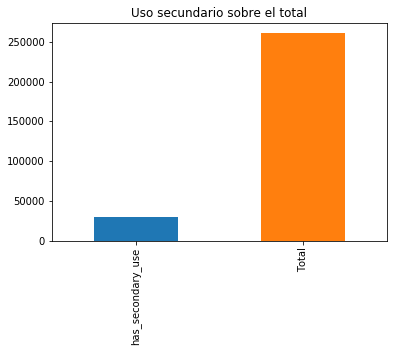

In [14]:
secondary_use.sum().plot(kind = 'bar', title= 'Uso secundario sobre el total')

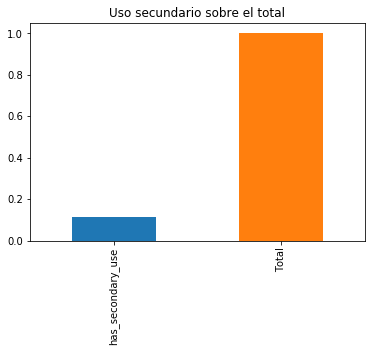

In [15]:
secondary_use_percentage= secondary_use.sum()/len(types_of_materials.index)

secondary_use_percentage.plot(kind = 'bar', title= 'Uso secundario sobre el total')

In [16]:
secondary_use.sum()/len(types_of_materials.index)

has_secondary_use    0.11188
Total                1.00000
dtype: float64

## Distribucion de los tipos secundarios

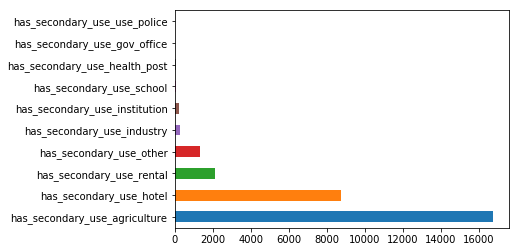

In [17]:
secondary_types= train_values.loc[train_values['has_secondary_use']==1,[
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

secondary_types.sum().sort_values(ascending = False).plot(kind='barh')

## El tipo legal mas comun es "v"

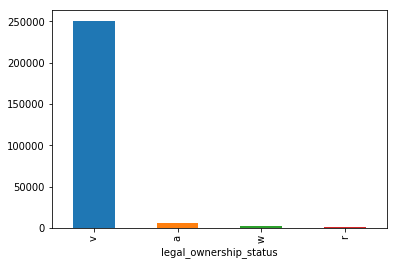

In [18]:
train_values.loc[:,['legal_ownership_status']].groupby('legal_ownership_status')['legal_ownership_status'].count().sort_values(ascending = False).plot(kind='bar')

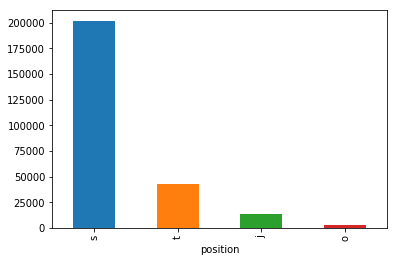

In [19]:

train_values.loc[:,['position']].groupby('position')['position'].count().sort_values(ascending = False).plot(kind='bar')

## La condicion de la superficie mas comun es "t"

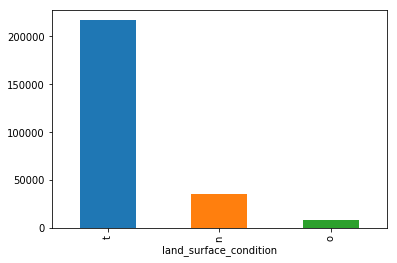

In [20]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')


## El Cimiento mas comun es "r"

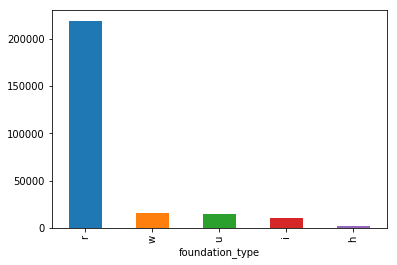

In [27]:
train_values.loc[:,['foundation_type']].groupby('foundation_type')['foundation_type'].count().sort_values(ascending = False).plot(kind='bar')


## La condicion de la superficie del terreno mas comun es "t"

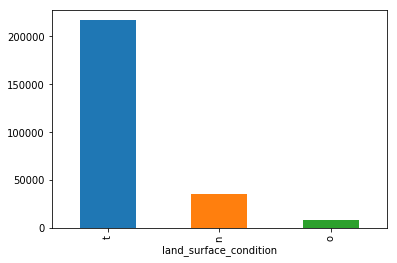

In [29]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')

## El tipo de techo mas comun es "n"

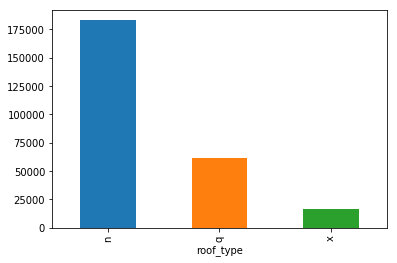

In [31]:
train_values.loc[:,['roof_type']].groupby('roof_type')['roof_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de piso mas comun "q"

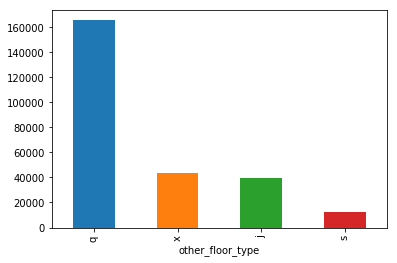

In [33]:
train_values.loc[:,['other_floor_type']].groupby('other_floor_type')['other_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de planta baja mas comun "f"

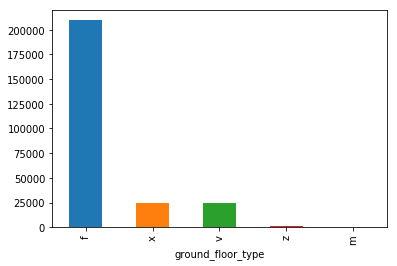

In [32]:
train_values.loc[:,['ground_floor_type']].groupby('ground_floor_type')['ground_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## La mayoria de los edificios tienen 2 pisos

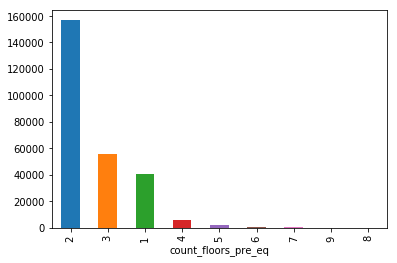

In [30]:
train_values.loc[:,['count_floors_pre_eq']].groupby('count_floors_pre_eq')['count_floors_pre_eq'].count().sort_values(ascending = False).plot(kind='bar')

## La configuracion de plan mas comun es "d"

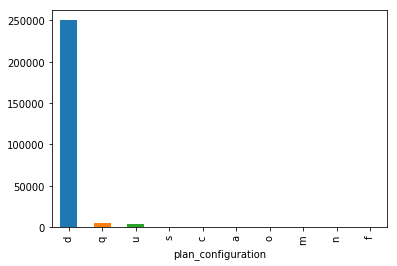

In [25]:
train_values.loc[:,['plan_configuration']].groupby('plan_configuration')['plan_configuration'].count().sort_values(ascending = False).plot(kind='bar')

## La distribucion de las edades de los edificios es la siguiente

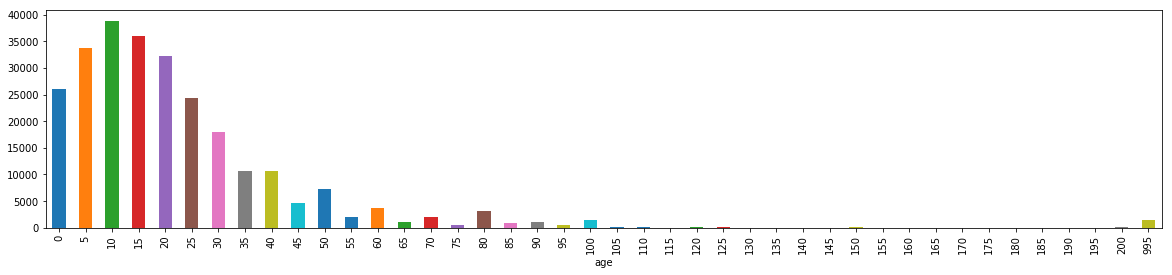

In [21]:

train_values.loc[:,['age']].groupby('age')['age'].count().plot(kind='bar',figsize=(20, 4))


Se puede ver que la mayoria de las edificaciones rondan los 30 años de antiguedad

## Porcentajes de areas edificadas

In [22]:
area_porcentages = train_values[['area_percentage']]

area_porcentages['total'] = 1

C:\Users\Matias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


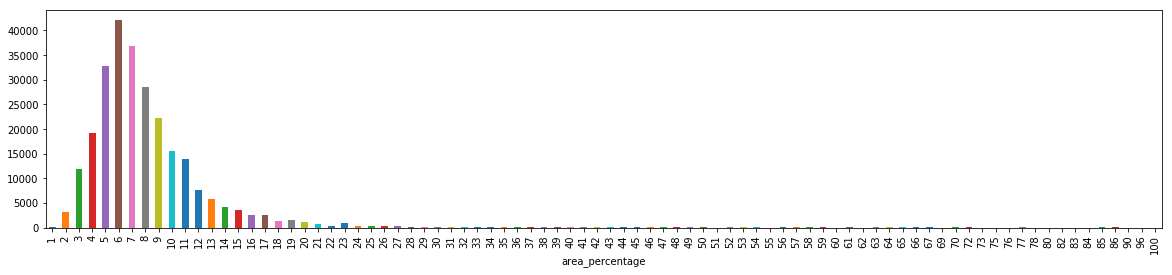

In [23]:
area_porcentages.groupby('area_percentage')['total'].sum().plot(kind='bar',figsize=(20, 4))

Se puede observar que el porcentaje de area construido es bastante reducido.

## Alturas mas comunes de edificios

C:\Users\Matias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


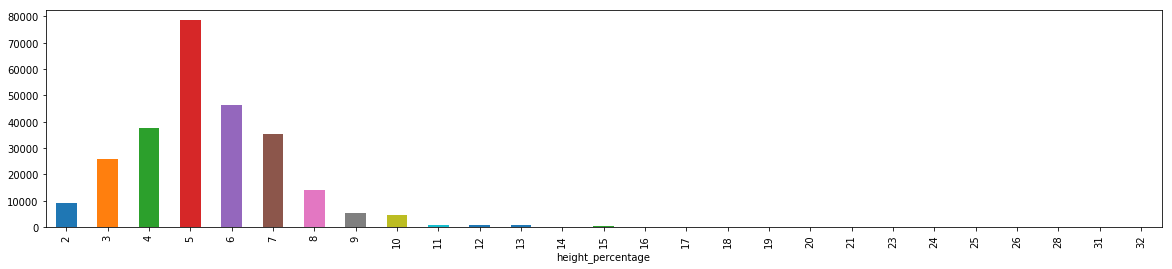

In [24]:
height_porcentages = train_values[['height_percentage']]

height_porcentages['total'] = 1
height_porcentages.groupby('height_percentage')['total'].sum().plot(kind='bar',figsize=(20, 4))
 

se puede observar que las edificacionesestan por lo general por debajo de los 10 metros???